# <span style="color:teal"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato per calcolare entrambi gli integrali è situato nella cartella <font face="Courier">/Lecture01/Esercizio1/MC_Integrals</font>.
    </p>

### <font face = "Tahoma" style="color:teal"><b>Esercizio 01.1 - Punto 1</b></font>

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red"> Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)  # Std deviation


def graphic(y,err_prog,ystring):       # grafico
    plt.figure(figsize=(10,5),tight_layout=True)
    n=len(y)
    x=np.arange(n)
    plt.errorbar(x,y,yerr=err_prog)
    X = [0, 100]
    Y = [0,0]
    plt.plot(X,Y,'k--')
    plt.xlabel('# blocks \n')
    plt.ylabel(ystring)
    plt.grid(alpha=0.4)
    plt.show()

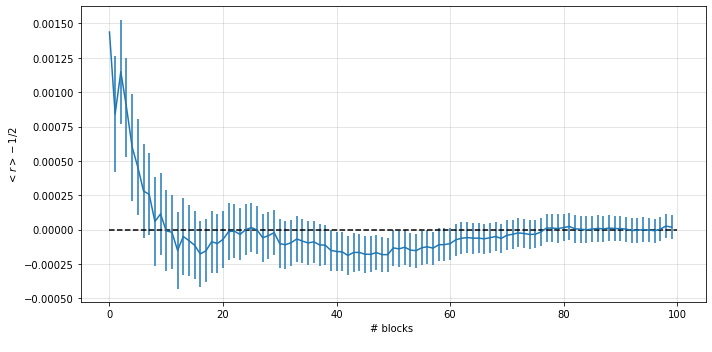

In [3]:
sum_prog_r = np.loadtxt(fname='Lecture01/Esercizio1/integral_mean.dat',usecols=2)
err_prog_r = np.loadtxt(fname='Lecture01/Esercizio1/integral_mean.dat',usecols=3)

graphic(sum_prog_r-0.5,err_prog_r,'$<r> - 1/2$')

### <font face = "Tahoma" style="color:teal"><b>Esercizio 01.1 - Punto 2</b></font>

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

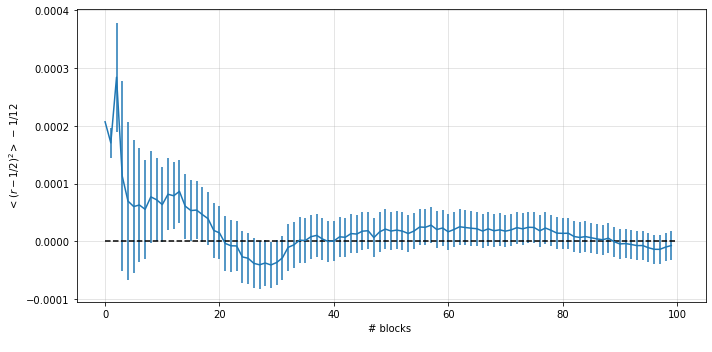

In [4]:
sum_prog_s = np.loadtxt(fname='Lecture01/Esercizio1/integral_sigma.dat',usecols=2)
err_prog_s = np.loadtxt(fname='Lecture01/Esercizio1/integral_sigma.dat',usecols=3)

graphic(sum_prog_s-(1/12),err_prog_s,'$<(r-1/2)^2>$ $-$ $1/12$')

### <font face = "Tahoma" style="color:teal"><b>Esercizio 01.1 - Punto 3</b></font>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.
### <font color="red">

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato è situato nella cartella <font face="Courier">Lecture01/Esercizio1/CHI_SQUARE</font>.
    </p>

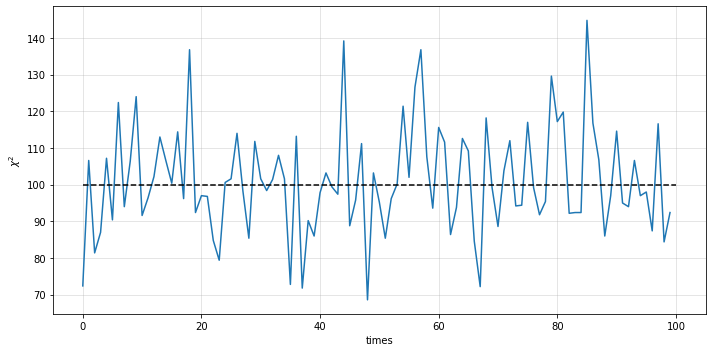

In [5]:
chi2 = np.loadtxt(fname='Lecture01/Esercizio1/chi2.dat')

plt.figure(figsize=(10,5),tight_layout=True)
plt.plot(chi2)
x = [0, 100]
y = [100,100]
plt.plot(x,y,'k--')
plt.xlabel('times')
plt.ylabel('$\chi^2$')
plt.grid(alpha=0.4)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

### <font face = "Tahoma" style="color:teal"><b>Esercizio 01.2 - Punto 1</b></font>

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato è situato nella cartella <font face="Courier">/Lecture01/Esercizio2/GeneratoreRandom</font>.
    </p>

<img src="Lecture01/RandomGen.png" width="1000">

Ecco una descrizione dei nuovi metodi implementati nella classe Random:
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <font size="+1" face = "Arial"><b><font style="color:teal">Lorentz</font> (<font style="color:#EC7063"><b>double</b></font> a, <font style="color:#EC7063"><b>double</b></font> mean)</b></font>
    <br>
    (La variabile <i>a</i> nel codice rappresenta qui la quantità $\Gamma$)
    <br>Voglio campionare una random variabile x con distribuzione di probabilità $$ $$
    $$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
    $$ -\infty<x<\infty.$$ La funzione cumulativa sarà $$F(x)=\int_0^x \frac{1}{\pi}\frac{\Gamma}{(x'-\mu)^2+\Gamma^2} dx'= \frac{1}{\pi} \tan^{-1}\big(\frac{x-\mu}{\Gamma}\big)+\frac{1}{2}.$$
    <br>
    Sia $y=F(x)\in[0,1]$ distribuita uniformemente. L'inversa della funzione cumulativa
    <br> 
    $$x=\mu+\Gamma \tan \big[\pi\big(y-\frac{1}{2}\big)\big]$$ 
    <br> 
    ci darà una random variabile distribuita secondo la distribuzione di probabilità desiderata.
    </p>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <font size="+1" ><b><font face = "Arial" style="color:teal">Lorentz</font>(<font face = "Tahoma" style="color:#EC7063"><b>double</b></font> a, <font face = "Tahoma" style="color:#EC7063"><b>double</b></font> mean, <font face = "Tahoma" style="color:#EC7063"><b>double</b></font> min, <font face = "Tahoma" style="color:#EC7063"><b>double</b></font> max)</b></font>
    <br>
    Voglio campionare una random variabile x con distribuzione di probabilità 
    <br> 
    $$p(x)=\frac{1}{\mathcal{N}}\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
    <br> 
    $$ x_{min}<x<x_{max}$$ dove $\mathcal{N}$ è la normalizzazione della distribuzione di Cauchy-Lorentz:
    <br>
    $$ \mathcal{N} = \int_{x_{min}}^{x_{max}} \frac{1}{\pi}\frac{\Gamma}{(x'-\mu)^2+\Gamma^2} dx'=\frac{1}{\pi}\big(\tan^{-1}\big(\frac{x_{max}-\mu}{\Gamma}\big)-\tan^{-1}\big(\frac{x_{min}-\mu}{\Gamma}\big)\big).$$ 
    <br>  
    La funzione cumulativa di $p(x)$ sarà 
    <br> 
    $$F(x)=\int_{x_{min}}^x \frac{1}{\mathcal{N}}\frac{1}{\pi}\frac{\Gamma}{(x'-\mu)^2+\Gamma^2} dx'= \frac{\tan^{-1}\big(\frac{x-\mu}{\Gamma}\big)-\tan^{-1}\big(\frac{x_{min}-\mu}{\Gamma}\big)}{\tan^{-1}\big(\frac{x_{max}-\mu}{\Gamma}\big)-\tan^{-1}\big(\frac{x_{min}-\mu}{\Gamma}\big)}.$$  
    <br> 
    Sia $y=F(x)\in[0,1]$ distribuita uniformemente. L'inversa della funzione cumulativa $$ $$ $$x=\mu+\Gamma \tan \lbrace \left[ \tan^{-1}\left(\frac{x_{max}-\mu}{\Gamma}\right)-\tan^{-1}\left(\frac{x_{min}-\mu}{\Gamma}\right)\right] y + \tan^{-1}\left(\frac{x_{min}-\mu}{\Gamma}\right)  \rbrace $$ 
    <br> 
    ci darà una random variabile distribuita secondo la distribuzione di probabilità desiderata.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <font size="+1" ><b><font face = "Arial" style="color:teal">Exponential</font>(<font face = "Tahoma" style="color:#EC7063"><b>double</b></font> L)</b></font>
    <br>
    Voglio campionare una random variabile x con distribuzione di probabilità 
    <br> 
    $$p(x)=\lambda \exp(-\lambda x)$$ 
    <br> 
    $$0\leq x < \infty.$$ La funzione cumulativa sarà $$F(x)=\int_0^x \lambda e^{-\lambda x'} dx' = 1 - e^{-\lambda x}.$$ 
    <br>
    Sia $y=F(x)\in[0,1]$ distribuita uniformemente. 
    L'inversa della funzione cumulativa 
    <br> 
    $$x=-\frac{1}{\lambda}ln\big(1-y\big)$$ 
    <br>
    ci darà una random variabile distribuita secondo la distribuzione di probabilità desiderata.
    </p>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <font size="+1" ><b><font face = "Arial" style="color:teal">Exponential</font>(<font face = "Tahoma" style="color:#EC7063"><b>double</b></font> L, <font face = "Tahoma" style="color:#EC7063"><b>double</b></font> max)</b></font>
    <br>
    Voglio campionare una random variabile x con distribuzione di probabilità 
    <br> 
    $$p(x)=\frac{1}{\mathcal{N}}\lambda e^{-\lambda x}$$ 
    <br> 
    $$ 0<x<x_{max}$$ dove $\mathcal{N}$ è la normalizzazione della distribuzione: 
    <br> 
    $$\mathcal{N}=\int_{0}^{x_{max}}\lambda e^{-\lambda x} = 1-e^{-\lambda x_{max}}.$$ 
    <br> 
    La funzione cumulativa di $p(x)$ sarà 
    <br> 
    $$F(x)=\int_{0}^x \frac{1}{1-e^{-\lambda x_{max}}} \lambda \exp(-\lambda x) = \frac{1-e^{-\lambda x}}{1-e^{-\lambda x_{max}}}.$$  
    <br> 
    Sia $y=F(x)\in[0,1]$ distribuita uniformemente. L'inversa della funzione cumulativa 
    <br> 
    $$x=-\frac{1}{\lambda} ln\big( 1 - (1 - e^{-\lambda x_{max}}) y \big) $$ 
    <br> 
    ci darà una random variabile distribuita secondo la distribuzione di probabilità desiderata.
    </p>

### <font face = "Tahoma" style="color:teal"><b>Esercizio 01.2 - Punto 2</b></font>

2. <font color="red"> Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).
Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [6]:
def sums(arr,n,S):    # legge un array di numeri random e restituisce la realizzazione di S_N

    S = np.zeros(1000)  # azzero l'array
    i=0
    if(n==1):
        while(i<1000):
            S[i]=arr[i]
            i+=1
    else:
        h=0
        while(i<n*1000):
            for k in range(n):
                S[h]+=arr[i]
                i+=1
            S[h]/=n
            h+=1
    return S

In [7]:
n_bins=50

S_1 = np.zeros(1000)
S_2 = np.zeros(1000)
S_10 = np.zeros(1000)
S_100 = np.zeros(1000)

<font size="+1" face = "Arial"><b><font style="color:teal">Lanci di un dado standard (distribuzione uniforme)</font>

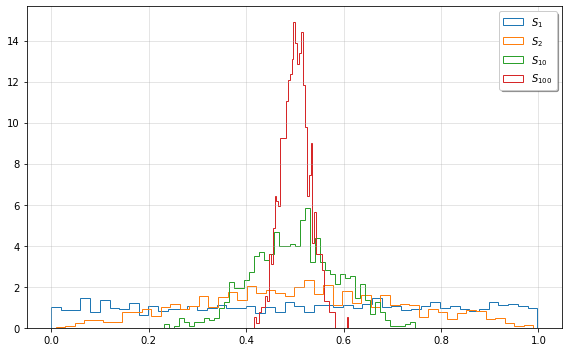

In [8]:
r = np.loadtxt(fname='Lecture01/uniform.dat')

S_1 = sums(r,1,S_1)
S_2 = sums(r,2,S_2)
S_10 = sums(r,10,S_10)
S_100 = sums(r,100,S_100)

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True)
ax.hist(S_1, n_bins, density=True, histtype='step',label='$S_1$', stacked=True, fill=False)
ax.hist(S_2, n_bins, density=True, histtype='step',label='$S_2$', stacked=True, fill=False)
ax.hist(S_10, n_bins, density=True, histtype='step',label='$S_{10}$', stacked=True, fill=False)
ax.hist(S_100, n_bins, density=True, histtype='step',label='$S_{100}$', stacked=True, fill=False)
legend = ax.legend(loc='upper right', shadow=True)
plt.grid(alpha=0.4)
plt.show()

<font size="+1" face = "Arial"><b><font style="color:teal">Lanci di un dado con distribuzione esponenziale</font>

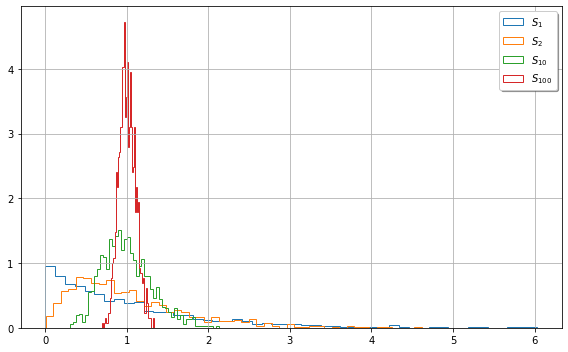

In [9]:
e = np.loadtxt(fname='Lecture01/exponential.dat')

S_1 = sums(e,1,S_1)
S_2 = sums(e,2,S_2)
S_10 = sums(e,10,S_10)
S_100 = sums(e,100,S_100)

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True)
ax.hist(S_1, n_bins, density=True, histtype='step',label='$S_1$', stacked=True, fill=False)
ax.hist(S_2, n_bins, density=True, histtype='step',label='$S_2$', stacked=True, fill=False)
ax.hist(S_10, n_bins, density=True, histtype='step',label='$S_{10}$', stacked=True, fill=False)
ax.hist(S_100, n_bins, density=True, histtype='step',label='$S_{100}$', stacked=True, fill=False)
legend = ax.legend(loc='upper right', shadow=True)
plt.grid(True)
plt.show()

<font size="+1" face = "Arial"><b><font style="color:teal">Lanci di un dado con distribuzione lorentziana</font>

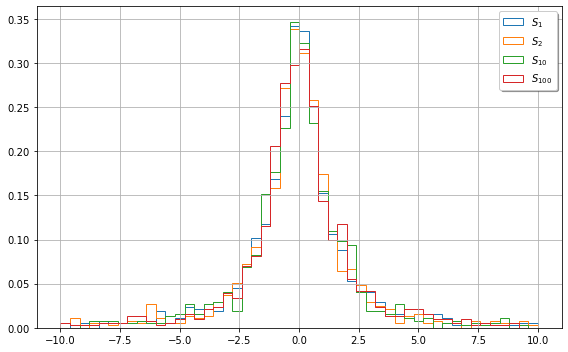

In [10]:
l = np.loadtxt(fname='Lecture01/lorentz.dat')

S_1 = sums(l,1,S_1)
S_2 = sums(l,2,S_2)
S_10 = sums(l,10,S_10)
S_100 = sums(l,100,S_100)

fig, ax = plt.subplots(figsize=(8,5),tight_layout=True)
ax.hist(S_1, n_bins, density=True,range=[-10,10], histtype='step',label='$S_1$', stacked=True, fill=False)
ax.hist(S_2, n_bins, density=True,range=[-10,10], histtype='step',label='$S_2$', stacked=True, fill=False)
ax.hist(S_10, n_bins, density=True,range=[-10,10], histtype='step',label='$S_{10}$', stacked=True, fill=False)
ax.hist(S_100, n_bins, density=True, range=[-10,10],histtype='step',label='$S_{100}$', stacked=True, fill=False)
legend = ax.legend(loc='upper right', shadow=True)
plt.grid(True)
plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato è situato nella cartella <font face="Courier">/Lecture01/Esercizio3/BUFFON</font>.
    </p>

<img src="Lecture01/Esercizio3/Buffon_exp.jpeg" width="500">

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per simulare l'esperimento di Buffon colloco il sistema nel piano cartesiano come in figura. Grazie alle simmetrie del sistema, mi concentro solo sulla striscia verticale compresa tra 0 e $\frac{d}{2}$. <br> <br>
    Per svolgere l'esperimento è sufficiente conoscere ad ogni step dove cade il centro dell'ago e con quale inclinazione.
    In particolare, per capire se l'ago cada o meno sulla linea (coincidente con l'asse y), basta calcolare la differenza tra la coordinata x del punto in cui cade il centro dell'ago ($L_{x,center}$) e la proiezione della metà sinistra dell'ago sull'orizzontale:
    $$ L_{x,center} - \frac{L}{2} cos(\theta),$$ dove $L$ è la lunghezza dell'ago e $\theta$ la sua inclinazione rispetto all'orizzontale; se tale differenza è negativa, allora l'ago cade sulla linea, altrimenti no.
    </p>
    
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Per campionare $cos(\theta)$ senza usare esplicitamente $\pi$ utilizzo la <i><b>Rejection Technique</b></i>: <br>
    <p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5; margin-left:200px; margin-right:350px;">
    <font face="Courier">do {
        <br>x = rnd.Rannyu();
        <br>y = rnd.Rannyu();
    <br>} while(x*x+y*y>=1);
    </font>
    </p>
    <br>
    <p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Invece per generare la coordinata x del punto in cui cade centro dell'ago è sufficiente una sequenza uniforme di numeri random $L_{x,center}$ appartenenti all'intervallo $[0,\frac{d}{2}]$.
</p>

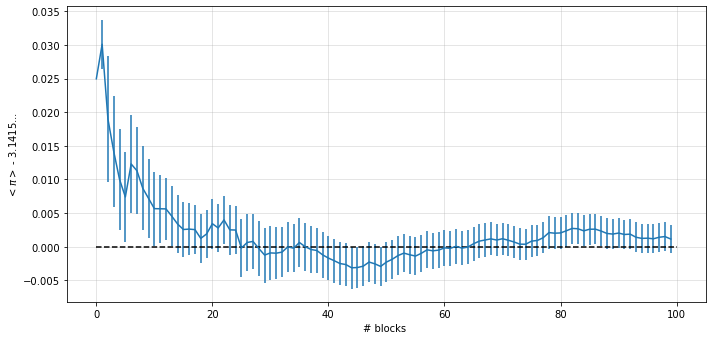

In [11]:
sum_prog_pi = np.loadtxt(fname='Lecture01/Esercizio3/output_pi.dat',usecols=2)
err_prog_pi = np.loadtxt(fname='Lecture01/Esercizio3/output_pi.dat',usecols=3)

graphic(sum_prog_pi-math.pi,err_prog_pi,'$<\pi>$ - $3.1415$...')

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?